# 2. Data preprocessing and visualization

In real life, it is estimated that data scientists spend 80% of their time cleaning and preprocessing data. This is because data is often messy and needs to be cleaned and transformed before it can be used for modeling. This is why data preprocessing is an essential step in the machine learning pipeline.

In data science, the GIGO principle (Garbage In, Garbage Out) holds true. This means that if you feed the model dirty, unclean data, you will get dirty, unclean results. This is why data preprocessing is so important.

In this section, we will learn the basics of data preprocessing using the Pandas library. We will learn how to clean and transform data, handle missing data, and visualize data using Matplotlib.

As an example, we will use the custom Health dataset:

> [The Health dataset](../datasets/health.csv)

## Examining the dataset

Before even loading the data into a data frame, it is advisable to inspect the data visually and make sure that you understand the meaning of each variable in the data set.

In this case, the data set has the following variables:

| Variable    | Description                                                         |
|-------------|---------------------------------------------------------------------|
| ID          | Title                                                               |
| Weight      | Weight of the individual, in kg, measured by a qualified nurse      |
| Smoking     | Self-reported smoking, 0 = no, 1 =yes                               |
| Exercise    | Physical activity index, between 0 and 10, based on a questionnaire |
| Cholesterol | Blood cholesterol concentration, mmol/l, lab measurement            |
| Income      | Self-reported montly income                                         |
| Happiness   | Happiness index, between 0 and 100, based on a questionnaire        |
| BirthYear   | Year of birth of the individual                                     |
| Sex         | (Biological) Sex, 1 = male, 2 = female                              |

> Throughout this material, whenever we use the term Sex, it refers to the strictly biological (physical) definition, usually relevant to datasets involving anatomical data. Whenever we use the term Gender, we refer to the socially constructed, potentially nonbinary concept that includes a diverse range of identities, which we acknowledge and respect.


## Parsing the dataset

We start by loading the Person dataset into a data frame:

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/health/health_v1.csv')
df.head()


,ID;Weight;Smoking;Exercise;Cholesterol;Income;Happiness;BirthYear;Sex
1;75;0;3;5,8;3230;59;1964;1
2;70;0;6;5,9;1420;43;1952;1
3;76;0;6;6;4930;74;1951;1,NaN
4;62;0;8;4,7;2970;58;1959;1
5;44;0;8;4,3;4780;64;1925;1



The initial loading attempt failed, as the file is not in the correct format. These kinds of errors are common in data preprocessing, and we need to handle them before we can proceed.

We can spot at least one problems with the dataset: all the values go into the first column. This is because the values are separated by semicolons, not commas. We can fix this by adding the `sep` parameter to the `read_csv` function:


In [2]:
df = pd.read_csv('datasets/health/health_v1.csv', sep=';', na_values='NaN')
df.head(20)

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
0,1,75.0,0.0,3,"5,8",3230,59.0,1964,1
1,2,70.0,0.0,6,"5,9",1420,43.0,1952,1
2,3,76.0,0.0,6,6,4930,74.0,1951,1
3,4,62.0,0.0,8,"4,7",2970,58.0,1959,1
4,5,44.0,0.0,8,"4,3",4780,64.0,1925,1
5,6,74.0,0.0,6,"5,3",2610,43.0,1953,1
6,7,85.0,0.0,8,"2,8",3480,81.0,1990,2
7,8,66.0,0.0,6,"5,3",360,45.0,1952,1
8,9,67.0,0.0,7,"4,9",3920,82.0,1941,1
9,10,82.0,0.0,3,"5,1",2510,33.0,1952,1


After this attempt, things look better. We can see that the data is now correctly separated into columns, and the missing values are now represented as `NaN`. However, thev values in the Cholesterol column raise some suspicion. The decimal separator is a comma, which is not the default for pandas. We need one more attempt to load the data correctly:

In [3]:
df = pd.read_csv('datasets/health/health_v1.csv', sep=';', na_values='NaN', decimal=',')
df.head()

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
0,1,75.0,0.0,3,5.8,3230,59.0,1964,1
1,2,70.0,0.0,6,5.9,1420,43.0,1952,1
2,3,76.0,0.0,6,6.0,4930,74.0,1951,1
3,4,62.0,0.0,8,4.7,2970,58.0,1959,1
4,5,44.0,0.0,8,4.3,4780,64.0,1925,1


Now things look superficially correct, but there is still some suspicion about the data types. In the original data set, both the Weight and Exercise fields seemed to have integer values, but now the former seems to have been transformed into a float. We can check the data types of the columns with the `dtypes` attribute:

In [4]:
df.dtypes

ID               int64
Weight         float64
Smoking        float64
Exercise        object
Cholesterol    float64
Income          object
Happiness      float64
BirthYear       object
Sex             object
dtype: object

As we check the types, we see that the Exercise, Income, BirthYear, and Sex fields are interpreted as objects (strings). Technically, we can convert the three first fields into integers and the last one into a category. That is done with the `astype` method:

In [5]:
df['Exercise'] = df['Exercise'].astype(int)
df['Income'] = df['Income'].astype(int)
df['BirthYear'] = df['BirthYear'].astype(int)
df['Sex'] = pd.Categorical(df['Sex'])

ValueError: invalid literal for int() with base 10: ' '

The type conversion fails on the first line. This is quite expected, bearing in mind that Pandas did not guess the type correctly in the first place.

At this point, we need to dive into the original data set and see what is causing the problem. We can use the `unique` method to check the unique values in the columns. Let's start with the first variable, Exercise, as it is expected to have just a few unique values:

In [6]:
df.Exercise.unique()

array(['3', '6', '8', '7', '5', '4', '2', '9', '10', '0', '1', ' '],
      dtype=object)

The output reveals that there is an extra value, a space, in the Exercise column.

At this time, we revert back to the original dataset and find clues about the problem. A simple search for two semicolons in a row reveals that there are some missing values in the dataset which are simply encoded by omitting the value. We can fix this by adding the `na_values` parameter to the `read_csv` function. Let's start again with reading the data into a data frame:

In [7]:
df = pd.read_csv('datasets/health/health_v1.csv', sep=';', na_values=['', ' '], decimal=',')
df.Exercise.unique()

array([ 3.,  6.,  8.,  7.,  5.,  4.,  2.,  9., 10.,  0.,  1., nan])

Now the problem has been solved, at least for the Exercise column.

Let's check the data types again:

In [8]:
df.dtypes

ID               int64
Weight         float64
Smoking        float64
Exercise       float64
Cholesterol    float64
Income         float64
Happiness      float64
BirthYear      float64
Sex             object
dtype: object

The Sex variable is still an object. We convert it to a category:

In [9]:
df['Sex'] = pd.Categorical(df['Sex'])

... and check the unique values once more:

In [10]:
df.Sex.unique()

['1', '2', 'Male', 'Female']
Categories (4, object): ['1', '2', 'Female', 'Male']

It seems that there are four different values: 1, 2, Male and Female. The Sex column has initially been encoded so that `1` represents male, and `2` represents female. The written values `Male` and `Female` are probably errors in the data set. We could replace them with missing values, but, as we know the obvious correct replacements, we can simply convert them into integers.

For this, we need to tinker with the `replace` method. We first temporarily convert the variable to a string, then use the `replace` method, and finally convert the variable back to a category:

In [11]:
df['Sex'] = df['Sex'].astype(str)
df['Sex'] = df['Sex'].replace({'Male': '1', 'Female': '2'})
df['Sex'] = df['Sex'].astype('category')

Now that the data seems to have been parsed and interpreted successfully,
we can print the basic statistics:

In [12]:
df.describe(include='all')

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
count,1000.000000,999.000000,999.000000,998.000000,1000.00000,997.000000,999.000000,999.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523
mean,500.500000,79.717718,0.232232,5.092184,5.72750,3069.829488,51.171171,1954.111111,NaN
std,288.819436,25.252719,0.422468,2.030736,1.39649,1264.497563,17.511569,21.443328,NaN
min,1.000000,8.000000,0.000000,0.000000,-7.50000,0.000000,0.000000,1879.000000,NaN
25%,250.750000,70.000000,0.000000,4.000000,4.87500,2220.000000,39.000000,1939.000000,NaN
50%,500.500000,80.000000,0.000000,5.000000,5.80000,3140.000000,50.000000,1954.000000,NaN
75%,750.250000,88.000000,0.000000,6.000000,6.60000,3890.000000,63.000000,1969.000000,NaN


At this point, the data seems to be in a good shape. We have successfully loaded the data into a data frame, and we have fixed the data types of the columns. The next step is to clean the data by handling the missing values as well as looking for any anomalies in the data.

## Treating missing values and outliers

In machine learning, missing values may have a significant impact on the performance of the model. There are several ways to handle missing values, including:
- Just ignoring them. In many cases, this is the easiest and most efficient way to handle missing values. However, this approach may skew the data, if there is a systematic reason for the missing values.
- Removing rows with missing values. If there is a reason to believe that the missing values are randomly distributed among rows, removing rows with missing values is a good option. However, removing an entire row when there is just one missing value may lead to a loss of valuable data.
- Removing columns with missing values. If a column has a large number of missing values, it may be better to remove the column altogether.
- Imputing missing values with the mean, median, or mode of the column. This is a common approach to handling missing values. However, this approach may introduce bias into the data, as it decreases the variance of the variable.
- Using machine learning algorithms to predict missing values. This is a more advanced approach to handling missing values. It is computationally expensive, but it may lead to better results.
- Using domain knowledge to fill in missing values. This means that a human expert fills in the missing values based on their knowledge of the data. This approach is highly dangerous, as it may introduce bias into the data.

Next, we use the first three methods to handle missing values in the Health dataset, the choice og the method depending on the variable at hand.

Erroneous values, or outliers, are values that are significantly different from the rest of the data. Outliers can have a significant impact on the performance of the model, as they can skew the data and lead to incorrect predictions. There are several ways to handle erroneous values, including:

- Encoding the erroneous as missing values. This is a good approach in many cases.
- Removing rows with an erroneous values. This approach may lead to a loss of valuable data.

Recognizing erroneous values can be challenging, as they can be caused by a variety of factors, including human error, measurement error, or data corruption. Sometimes, a value may initially appear to be an erroneous value, but upon further investigation, it may turn out to be a valid value. For example, a house with an abnormally high price may eventually turn out to be a luxury house of the local billionaire.

Handling missing values and outliers is a complex topic in machine learning, and statistics in general. There is no one-size-fits-all solution, and the best approach depends on the data at hand.

## Filtering and visualizing data

Now that the data set has been loaded into a data frame, we start exploring the data. The first step is to look for potential errors and outliers in the data. The output of the `describe()` method provides some clues on that:

- The minimum value of the Weight column is 8 kg, and the maximum value is 740 kg. These values are almost certainly errors.
- Some values in the Cholesterol column are negative, which is impossible.
- The values in the BirthYear column vary between 1879 and 2020. There is a possibility that the minimum value is an error. Also, as the subjects should be adults at the time of the survey (year 2024), the maximum value is suspicious.

To have a more detailed overview, let's make a graphical representation, a histogram, of each numerical variable. As we may want to make these histograms more than once, we can define a function for that:

In [13]:
import matplotlib.pyplot as plt

def plot_data(df):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
        plt.subplot(3, 3, i + 1)
        df[col].plot(kind='hist')
        plt.xlabel(col)

Now, we call the function:

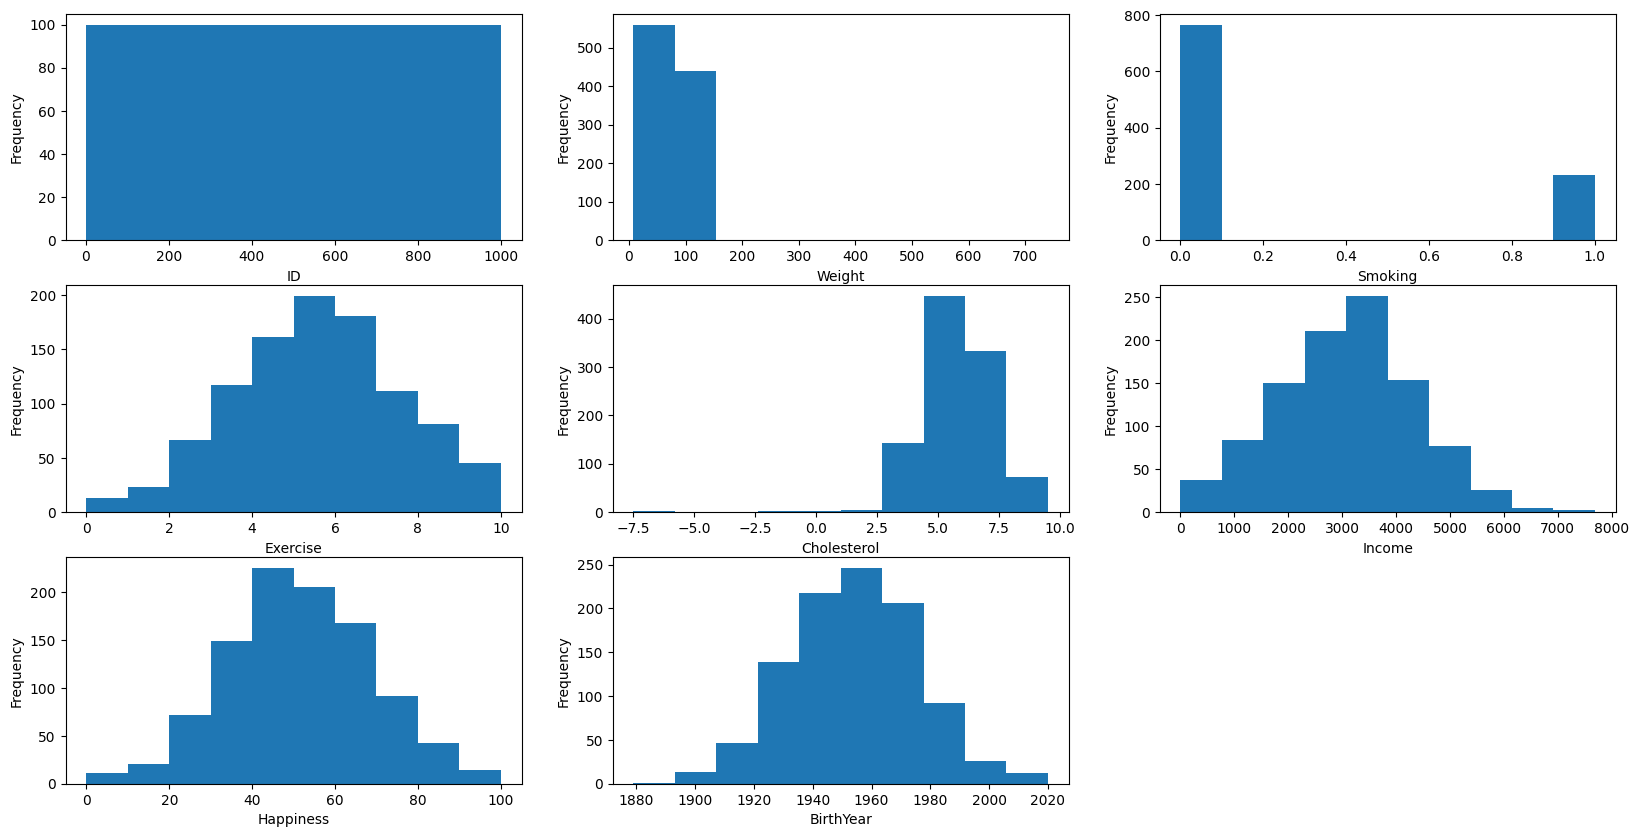

In [14]:
plot_data(df)

In construction of the histogram, we used **Matplotlib**, a popular plotting library for Python. In data analysis, this is one of the options. Other popular libraries include **Seaborn** and **Plotly**.

> [Matplotlib documentation](https://matplotlib.org/stable/index.html)

> Tip: Each visualization library has its own methods and functions for creating plots. It is a good idea to get familiar with the documentation of the library you are using. Also, AI tools such as **GitHub Copilot** can help you write the visualization code faster. Always remember to understand the code you are using, and not just blindly accept the suggestions.


# Filtering rows

Let's start the data cleansing by selecting rows that correpond to individuals whose age was between 18 and 99 years at the time of the survey (2024). We can do this by filtering the BirthYear column:

In [15]:
df = df[(df['BirthYear'] <= 2006) & (df['BirthYear'] >= 1925)]
df.describe(include='all')

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
count,916.000000,915.000000,915.000000,914.000000,916.000000,913.000000,915.000000,916.000000,916
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479
mean,499.403930,80.018579,0.231694,5.086433,5.697380,3055.147864,51.398907,1956.545852,NaN
std,287.480346,26.016589,0.422145,2.028864,1.299682,1252.155512,17.507904,17.987278,NaN
min,1.000000,8.000000,0.000000,0.000000,-1.900000,0.000000,0.000000,1925.000000,NaN
25%,253.500000,70.000000,0.000000,4.000000,4.800000,2220.000000,40.000000,1942.000000,NaN
50%,502.500000,80.000000,0.000000,5.000000,5.700000,3110.000000,51.000000,1956.000000,NaN
75%,746.250000,88.000000,0.000000,6.000000,6.600000,3890.000000,63.000000,1970.000000,NaN


# Filtering columns

Next, we remember that some of the weight values looked suspicious. We  filter the data by making sure all the weights are between 30 and 200 kg. All weights outside this range are replaced with missing values. In a similar fashion, we filter the Cholesterol column by removing all values smaller than 2.0 mmol/l:

In [16]:
df['Weight'] = df['Weight'].apply(lambda x: x if 30 <= x <= 200 else None)
df['Cholesterol'] = df['Cholesterol'].apply(lambda x: x if x >= 2.0 else None)
df

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
0,1,75.0,0.0,3.0,5.8,3230.0,59.0,1964.0,1
1,2,70.0,0.0,6.0,5.9,1420.0,43.0,1952.0,1
2,3,76.0,0.0,6.0,6.0,4930.0,74.0,1951.0,1
3,4,62.0,0.0,8.0,4.7,2970.0,58.0,1959.0,1
4,5,44.0,0.0,8.0,4.3,4780.0,64.0,1925.0,1
...,...,...,...,...,...,...,...,...,...
994,995,76.0,0.0,10.0,4.1,2900.0,61.0,1960.0,2
996,997,77.0,1.0,4.0,6.6,2990.0,45.0,1971.0,2
997,998,71.0,0.0,8.0,4.5,4840.0,74.0,1935.0,2
998,999,107.0,1.0,2.0,8.4,2030.0,38.0,1929.0,2


At this point, we probably want to re-plot the histograms with the previously-written function to see if the filtering has had the desired effect:

In [ ]:
plot_data(df)


At this point, the data has undergone initial inspection and cleaning. To get familiar with various data preprocessing options, we play around with the data a bit more.

## Adding a new variable

In the existing data set, there is a fixed set of variables. Let's suppose that we want to divide the persons into two group, A, and B, at random. We can do this by adding a new variable, Group, to the data set. New columns can be added to a data frame by simply assigning values to them:

In [ ]:
np.random.seed(42)
df['Group'] = np.random.choice(['A', 'B'], size=len(df))
df

## Renaming variables

Renaming a variable is a common task. Let's rename the Smoking variable to Smoker:

In [ ]:
df.rename(columns={'Smoking': 'Smoker'}, inplace=True)
df

The parameter `inplace=True` modifies the data frame in place, without creating a new data frame. If `inplace=False`, a new data frame is created, and the original data frame is not modified. The columns to be renamed are specified in a dictionary, where the keys are the old column names, and the values are the new column names.

## Merging data frames

Sometimes we need to combine two or more datasets based on the value of a common variable. This is called merging. Let's suppose we have another data set, Health2, which contains the ID values and blood glucose (sugar) values of the individuals. As the values are available for just a handful of individuals, we construct the dataframe manually from a dictionary (alternatively we could use the `pd.read_csv` function):

In [ ]:
# construct data set with ID and blood glucose values for some individuals
data = {'ID': [1, 3, 5, 7, 9],
        'Glucose': [5.2, 6.1, 5.8, 6.5, 5.9]}
df2 = pd.DataFrame(data)
df2

Now we proceed with the merging. We combine the values of `df2` into `df` based on the ID variable:

In [ ]:
df = pd.merge(df, df2, on='ID', how='left')
df

Note that all the remaining values in the Glucose column are automatically encoded as missing. This is because the merge operation is a left join, which means that all the values in the left data frame (`df`) are retained, and the missing values are filled with `NaN`. You may notice the resemblance of the `merge` function to the SQL `JOIN` operation.

## Dropping variables

Next, we drop the newly-created Group variable from the data frame, just to demonstrate how it is done:

In [ ]:
df.drop(columns=['Group'], inplace=True)
df


# Plotting a correlation matrix

Finally, we create a correlation matrix that displays the relationships between pairs of variables in the data set. This is done with the `corr()` method, which calculates the Pearson correlation coefficient between pairs of variables.

> As the ID variable is a unique identifier for each individual, it does not make sense to include it in the correlation matrix. We temporarily drop the variable from the data frame for the calculation:

In [ ]:
# calculate correlation matrix
corr = df.drop(columns=['ID']).corr()
corr

For each pair of variables in the data set, the correlation matrix shows the strength and direction of the relationship between the variables. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative relationship, 1 indicates a perfect positive relationship, and 0 indicates no relationship.

We can visualize the correlation matrix with a heatmap:

In [ ]:
# create heatmap with Matplotlib

plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

From the correlation matrix, we can observer, for example that:
- Weight and Cholesterol are positively correlated. The heigher the weight, the higher the cholesterol seems to be.
- Exercise and Happiness are positively correlated. The more the individual exercises, the happier they seem to be.
- Exercise and Cholesterol are negatively correlated. The more the individual exercises, the lower the cholesterol seems to be.

At this point, it is crucial to understand the difference between correlation and causation. Correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other. There may be other factors at play that are causing the correlation. For example, exercising more doesn't necessarily cause an individual's cholesterol level to decrease (causation). It may be that people who exercise more also eat healthier, which leads to lower cholesterol levels (correlation).

Printing the correlation matrix is a good way to get an overview of the relationships between variables in the data set. It can help understand the data, and it can provide ideas of how to proceed with the actual analysis.

# Playing with Matplotlib: a cumulative distribution function

In the previous examples, we used **Matplotlib** to create histograms and heatmaps. Matplotlib is a powerful library for creating static, animated, and interactive visualizations in Python. It is widely used in data science, machine learning, and scientific computing.

In this example, we will create a cumulative distribution function (CDF) plot using Matplotlib. A cumulative distribution function is a function that maps a value to the probability that a random variable is less than or equal to that value. It is a useful tool for visualizing the distribution of a dataset at even better detail than a histogram.

Let's start by plotting the CDF of the Cholesterol variable in the Health dataset:

In [ ]:
# sort the values in the Cholesterol column
sorted_data = df['Cholesterol'].sort_values()

# create a list of evenly spaced values between 0 and 1
cumulative = np.linspace(0, 1, len(sorted_data))

# create the plot
plt.figure(figsize=(10, 5))
plt.plot(sorted_data, cumulative)
plt.xlabel('Cholesterol')
plt.ylabel('Cumulative probability')
plt.title('Cumulative distribution function of cholesterol')
plt.show()


From the CDF we can read, for example, that around 80% of the individuals have a cholesterol level below 7 mmol/l.

This concludes the data preprocessing and visualization section. In the next section, we are ready to start building machine learning models using the cleaned and transformed data.